In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_csv = "data/city_data.csv"
ride_data_csv = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_csv)
ride_data_df = pd.read_csv(ride_data_csv)

# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, on="city")

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot

In [2]:
# Generate three data frames based on three "type" values and then group the data frames by city
urban_city_groupd = pyber_data_df[pyber_data_df["type"] == "Urban"].sort_values(by=["city"]).groupby([pyber_data_df["city"]])
#urban_city_groupd.head(20)

suburban_city_groupd = pyber_data_df[pyber_data_df["type"] == "Suburban"].sort_values(by=["city"]).groupby([pyber_data_df["city"]])
#suburban_city_groupd.head()

rural_city_groupd = pyber_data_df[pyber_data_df["type"] == "Rural"].sort_values(by=["city"]).groupby([pyber_data_df["city"]])
#rural_city_groupd.head()

In [3]:
# Calculate Total Number of Rides Per City as x axis, Average Fare Per City as y axis, and Total Number of Drivers Per City as size
x_urban = urban_city_groupd["city"].count()
#x_urban

y_urban = urban_city_groupd["fare"].mean()
#y_urban

s_urban = urban_city_groupd["driver_count"].mean()
#s_urban

x_suburban = suburban_city_groupd["city"].count()
#x_suburban

y_suburban = suburban_city_groupd["fare"].mean()
#y_suburban

s_suburban = suburban_city_groupd["driver_count"].mean()
#s_suburban

x_rural = rural_city_groupd["city"].count()
#x_rural

y_rural = rural_city_groupd["fare"].mean()
#y_rural

s_rural = rural_city_groupd["driver_count"].mean()
#s_rural


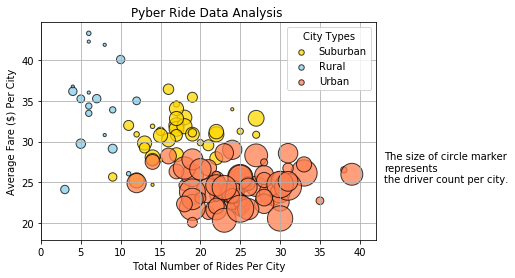

In [4]:
# Plot the scatter plot for each city type
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")

plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["SkyBlue"], edgecolor="black", alpha = 0.75, marker="o")

plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Label x axis, y axis, and title
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")
plt.title("Pyber Ride Data Analysis ")

# Create a legend
legend = plt.legend(fontsize = 10, title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(43,25,"The size of circle marker\nrepresents\nthe driver count per city.", fontsize = 10)

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("Bubble_Plot.png", bbox_inches="tight")

#plt.ylim(0, 45)

plt.xlim(0, 42)

# Show plot
plt.show()

## Total Fares by City Type

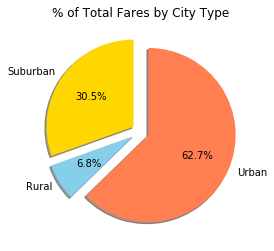

In [5]:
# Group by types of Suburban, Rural, and Urban
total_fare_city_type = pyber_data_df.groupby(['type'])

# Sum the fare for each type
total_fare_city_type = total_fare_city_type['fare'].sum()
##total_fare_city_type

# Labels for the Total Fares by City Type
labels = ["Suburban", "Rural", "Urban"]

# The values of Suburban, Rural, and Urban
sizes = [total_fare_city_type['Suburban'], total_fare_city_type['Rural'], total_fare_city_type['Urban']]

# The colors of Suburban, Rural, and Urban
colors = ["gold", "SkyBlue", "Coral"]

# Tells matplotlib to seperate Suburban,Rural,Urban sectors
explode = (0.1, 0.1, 0.1)

# Build Pie Chart with autopct to automatically calculate the percentages
plt.pie(sizes, explode=explode, labels=labels, colors=colors, \
        autopct="%1.1f%%", shadow=True, startangle=90)

# Add Title to the Pie Chart
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Fares.png")

# Show Pie Chart
plt.show()

## Total Rides by City Type

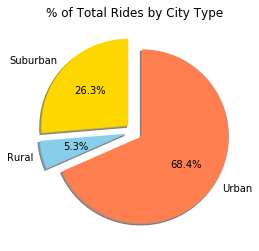

In [6]:
# Group by types of Suburban, Rural, and Urban
total_rides_city_type = pyber_data_df.groupby(['type'])

# Count the raid_id for each type
total_rides_city_type = total_rides_city_type['ride_id'].count()
total_rides_city_type


# Labels for the Total Rides by City Type
labels = ["Suburban", "Rural", "Urban"]

# The values of Suburban, Rural, and Urban
sizes = [total_rides_city_type['Suburban'], total_rides_city_type['Rural'], total_rides_city_type['Urban']]

# The colors of Suburban, Rural, and Urban
colors = ["gold", "SkyBlue", "Coral"]

# Tells matplotlib to seperate Suburban,Rural,Urban sectors
explode = (0.1, 0.1, 0.1)

# Build Pie Chart with autopct to automatically calculate the percentages
plt.pie(sizes, explode=explode, labels=labels, colors=colors, \
        autopct="%1.1f%%", shadow=True, startangle=90)

# Add Title to the Pie Chart
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Rides.png")

# Show Pie Chart
plt.show()

## Total Drivers by City Type

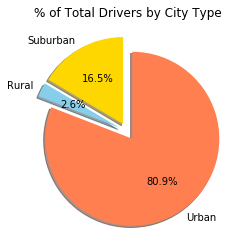

In [7]:
# Group by types of Suburban, Rural, and Urban
total_drivers_city_type = city_data_df.groupby(['type'])

# Count the raid_id for each type
total_drivers_city_type = total_drivers_city_type['driver_count'].sum()
total_drivers_city_type

# Labels for the Total Rides by City Type
labels = ["Suburban", "Rural", "Urban"]

# The values of Suburban, Rural, and Urban
sizes = [total_drivers_city_type['Suburban'], total_drivers_city_type['Rural'], total_drivers_city_type['Urban']]

# The colors of Suburban, Rural, and Urban
colors = ["gold", "SkyBlue", "Coral"]

# Tells matplotlib to seperate Suburban,Rural,Urban sectors
explode = (0.1, 0.1, 0.1)

# Build Pie Chart with autopct to automatically calculate the percentages
plt.pie(sizes, explode=explode, labels=labels, colors=colors, \
        autopct="%1.1f%%", shadow=True, startangle=90)

# Add Title to the Pie Chart
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Rides.png")

# Show Pie Chart
plt.show()